<a href="https://colab.research.google.com/github/renatomarquesteles/transfer-learning-cats-n-dogs/blob/main/tl-cats-and-dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import os

In [26]:
# Load the Dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_url, extract=True)
data_dir = os.path.join(os.path.dirname(data_dir), 'cats_and_dogs_filtered')

In [27]:
# Preprocessing the data
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(160, 160),
    batch_size=32)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(160, 160),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [28]:
# Load the pre-trained model
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                                      include_top=False,
                                                      weights='imagenet')

In [29]:
# Freeze the layers of the base model
pretrained_model.trainable = False

In [30]:
# Create the final model
model = models.Sequential([
    pretrained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2, activation='softmax')  # For two classes: cats and dogs
])

In [31]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Train the model
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 72s 868ms/step - accuracy: 0.6161 - loss: 0.7153 - val_accuracy: 0.6083 - val_loss: 0.7219
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 835ms/step - accuracy: 0.5997 - loss: 0.7043 - val_accuracy: 0.6133 - val_loss: 0.7054
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 90s 939ms/step - accuracy: 0.6045 - loss: 0.6981 - val_accuracy: 0.6100 - val_loss: 0.6982
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 77s 877ms/step - accuracy: 0.6132 - loss: 0.6801 - val_accuracy: 0.6200 - val_loss: 0.6912
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 62s 823ms/step - accuracy: 0.6255 - loss: 0.6667 - val_accuracy: 0.6083 - val_loss: 0.6887
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 838ms/step - accuracy: 0.6265 - loss: 0.6674 - val_accuracy: 0.6100 - val_loss: 0.6851
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6327 - loss: 0.6595 - val_accuracy: 0.5883 - val_loss: 0.6899
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 71s 945ms/step - accuracy: 0.6206 - loss: 0.6658 - val_accurac

In [33]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_dataset)
print(f"Accuracy: {accuracy * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 667ms/step - accuracy: 0.6251 - loss: 0.6564
Accuracy: 61.17%


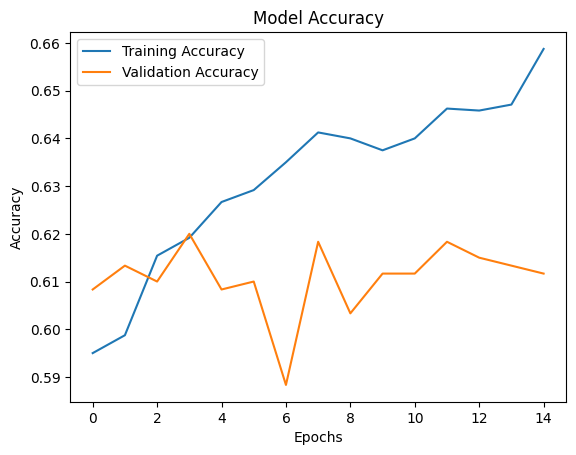

In [34]:
# Visualize the results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
# Test with real images
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(160, 160))
    img_array = image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = 'Dog' if predictions[0][1] > predictions[0][0] else 'Cat'

    print(f"The image is a: {predicted_class}")

Saving cat.jpg to cat (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The image is a: Cat
